In [97]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import shapiro,kstest,normaltest
import warnings
warnings.filterwarnings("ignore")
import pickle
import json

# Problem Statement

# Data Gathering

In [98]:
df = pd.read_csv("Pune_House_Data.csv")

In [99]:
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


# Exploratory Data Analysis

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [101]:
df.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

### 1. size

In [102]:
df["size"].value_counts().to_dict()

{'2 BHK': 5199,
 '3 BHK': 4310,
 '4 Bedroom': 826,
 '4 BHK': 591,
 '3 Bedroom': 547,
 '1 BHK': 538,
 '2 Bedroom': 329,
 '5 Bedroom': 297,
 '6 Bedroom': 191,
 '1 Bedroom': 105,
 '8 Bedroom': 84,
 '7 Bedroom': 83,
 '5 BHK': 59,
 '9 Bedroom': 46,
 '6 BHK': 30,
 '7 BHK': 17,
 '1 RK': 13,
 '10 Bedroom': 12,
 '9 BHK': 8,
 '8 BHK': 5,
 '11 BHK': 2,
 '11 Bedroom': 2,
 '10 BHK': 2,
 '14 BHK': 1,
 '12 Bedroom': 1,
 '16 BHK': 1,
 '27 BHK': 1,
 '19 BHK': 1,
 '13 BHK': 1,
 '43 Bedroom': 1,
 '18 Bedroom': 1}

In [103]:
df["size"].fillna(df["size"].mode()[0], inplace=True)

### 2. society

In [104]:
df["society"].isna().sum()

5502

In [105]:
df.drop("society", axis=1,inplace=True)

### 3. bath

In [106]:
df["bath"].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [107]:
df["bath"].isna().sum()

73

In [108]:
df["bath"].fillna(df["bath"].median(),inplace = True)

In [109]:
df["bath"].isna().sum()

0

### 4. balcony

In [110]:
df["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [111]:
df["balcony"].isna().sum()

609

In [112]:
df["balcony"].fillna(df["balcony"].median(),inplace = True)

In [113]:
df["balcony"].isna().sum()

0

### 5. site_location

In [114]:
df["site_location"].value_counts()

Jangali Maharaj Road    139
Navi Peth               139
Hadapsar                139
Mundhawa                139
Dehu Road               139
                       ... 
Ghorpadi                138
Sinhagad Road           138
Satara Road             138
Vishrant Wadi           138
other                     1
Name: site_location, Length: 97, dtype: int64

In [115]:
df["site_location"].isna().sum()

1

In [116]:
df["site_location"].fillna(df["site_location"].mode()[0],inplace=True)

In [117]:
df["site_location"].isna().sum()

0

# Feature Engineering

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13320 non-null  object 
 3   total_sqft     13320 non-null  object 
 4   bath           13320 non-null  float64
 5   balcony        13320 non-null  float64
 6   price          13320 non-null  float64
 7   site_location  13320 non-null  object 
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [119]:
df.isna().sum()

area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

### 1. area_type

In [120]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [121]:
df = pd.get_dummies(df,columns = ["area_type"])

### 2. availability

In [122]:
df["availability"].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
15-Aug               1
16-Jan               1
15-Jun               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [123]:
df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [124]:
list1 = df["availability"].unique().tolist()
dict_availability = {i : 0 for i in list1}
dict_availability['Ready To Move'] = 1
dict_availability['Immediate Possession'] = 1
df.replace(dict_availability, inplace=True)
print(df["availability"].value_counts().to_dict())

{1: 10597, 0: 2723}


### 3. size

In [125]:
df["size"].value_counts().to_dict()

{'2 BHK': 5215,
 '3 BHK': 4310,
 '4 Bedroom': 826,
 '4 BHK': 591,
 '3 Bedroom': 547,
 '1 BHK': 538,
 '2 Bedroom': 329,
 '5 Bedroom': 297,
 '6 Bedroom': 191,
 '1 Bedroom': 105,
 '8 Bedroom': 84,
 '7 Bedroom': 83,
 '5 BHK': 59,
 '9 Bedroom': 46,
 '6 BHK': 30,
 '7 BHK': 17,
 '1 RK': 13,
 '10 Bedroom': 12,
 '9 BHK': 8,
 '8 BHK': 5,
 '11 BHK': 2,
 '11 Bedroom': 2,
 '10 BHK': 2,
 '14 BHK': 1,
 '12 Bedroom': 1,
 '16 BHK': 1,
 '27 BHK': 1,
 '19 BHK': 1,
 '13 BHK': 1,
 '43 Bedroom': 1,
 '18 Bedroom': 1}

In [126]:
dict_size = {'2 BHK': 2,
 '3 BHK': 3,
 '4 Bedroom': 4,
 '4 BHK': 4,
 '3 Bedroom': 3,
 '1 BHK': 1,
 '2 Bedroom': 2,
 '5 Bedroom': 5,
 '6 Bedroom': 6,
 '1 Bedroom': 1,
 '8 Bedroom': 8,
 '7 Bedroom': 7,
 '5 BHK': 5,
 '9 Bedroom': 9,
 '6 BHK': 6,
 '7 BHK': 7,
 '1 RK': 1,
 '10 Bedroom': 10,
 '9 BHK': 9,
 '8 BHK': 8,
 '11 BHK': 11,
 '11 Bedroom': 11,
 '10 BHK': 10,
 '14 BHK': 14,
 '13 BHK': 13,
 '12 Bedroom': 12,
 '27 BHK': 27,
 '43 Bedroom': 43,
 '16 BHK': 16,
 '19 BHK': 19,
 '18 Bedroom': 18}
df.replace(dict_size, inplace=True)

In [127]:
df["size"].value_counts().to_dict()

{2: 5544,
 3: 4857,
 4: 1417,
 1: 656,
 5: 356,
 6: 221,
 7: 100,
 8: 89,
 9: 54,
 10: 14,
 11: 4,
 27: 1,
 14: 1,
 43: 1,
 18: 1,
 12: 1,
 13: 1,
 16: 1,
 19: 1}

### 4. total_sqft

In [128]:
df["total_sqft"].value_counts().to_dict()

{'1200': 843,
 '1100': 221,
 '1500': 205,
 '2400': 196,
 '600': 180,
 '1000': 172,
 '1350': 133,
 '1050': 123,
 '1300': 117,
 '1250': 114,
 '900': 112,
 '1400': 108,
 '1800': 104,
 '1150': 101,
 '1600': 101,
 '1140': 91,
 '2000': 83,
 '1450': 70,
 '1650': 69,
 '800': 67,
 '1075': 66,
 '3000': 66,
 '1020': 63,
 '2500': 62,
 '1160': 60,
 '1550': 60,
 '1125': 60,
 '950': 59,
 '1700': 58,
 '1180': 58,
 '1260': 57,
 '1255': 56,
 '1220': 55,
 '1080': 55,
 '1070': 53,
 '700': 52,
 '750': 52,
 '4000': 48,
 '1225': 48,
 '1175': 48,
 '1320': 46,
 '2100': 46,
 '1240': 46,
 '1230': 45,
 '1060': 45,
 '1210': 44,
 '850': 43,
 '1280': 42,
 '1185': 41,
 '1270': 41,
 '1190': 40,
 '1410': 40,
 '1170': 40,
 '1750': 39,
 '1330': 38,
 '1025': 38,
 '1310': 37,
 '1290': 37,
 '1850': 37,
 '1065': 36,
 '1194': 36,
 '1215': 35,
 '1090': 35,
 '500': 34,
 '1360': 33,
 '1115': 33,
 '2700': 33,
 '1900': 32,
 '1120': 32,
 '1464': 32,
 '3500': 32,
 '1205': 31,
 '1430': 31,
 '2200': 31,
 '1530': 31,
 '1340': 31,
 '156

In [129]:
list1 = df["total_sqft"].to_list()
print(list1)

['1056', '2600', '1440', '1521', '1200', '1170', '2732', '3300', '1310', '1020', '1800', '2785', '1000', '1100', '2250', '1175', '1180', '1540', '2770', '1100', '600', '1755', '2800', '1767', '510', '1250', '660', '1610', '1151', '1025', '2100 - 2850', '1075', '1760', '1693', '1925', '700', '1070', '1724', '1290', '1143', '1296', '1254', '600', '660', '1330.74', '600', '970', '1459', '800', '869', '1270', '1670', '2010', '1185', '1600', '1200', '3010 - 3410', '1500', '1407', '840', '4395', '845', '5700', '1160', '3000', '1100', '1140', '1220', '1350', '1005', '500', '1358', '1569', '1240', '2089', '1206', '1150', '2511', '460', '4400', '1660', '2957 - 3450', '1326', '1325', '1499', '3000', '1665', '708', '1060', '710', '1000', '1000', '1450', '1200', '1296', '1540', '2894', '1330', '1200', '1200', '2502', '650', '2400', '1007', '1200', '966', '1630', '1640', '782', '1260', '1800', '1413', '1116', '1530', '3700', '2497', '1540', '1436', '1100', '276', '1427', '2061', '3067 - 8156', '265

In [130]:
list1 = df["total_sqft"].to_list()

for index,i in enumerate(list1):
    if "-" in i:
        sub_list = i.split()
        value = float(sub_list[0]) + float(sub_list[2])
        list1[index] = value
        
    elif "Sq. Yards" in i:
        value = i.split("Sq. Yards")       
        list1[index] = float(value[0])*9
        
    elif "Sq. Meter" in i:
        value = i.split("Sq. Meter")       
        list1[index] = float(value[0])*10.764
        
    elif "Guntha" in i:
        value = i.split("Guntha")       
        list1[index] = float(value[0])*1089
        
    elif "Acres" in i:
        value = i.split("Acres")       
        list1[index] = float(value[0])*43560
        
    elif "Cents" in i:
        value = i.split("Cents")       
        list1[index] = float(value[0])*435.56
        
    elif "Perch" in i:
        value = i.split("Perch")       
        list1[index] = float(value[0])*272.25
        
    elif "Grounds" in i:
        value = i.split("Grounds")       
        list1[index] = float(value[0])*2400
        
    else:    
        list1[index] = float(i)
           
print(list1)

[1056.0, 2600.0, 1440.0, 1521.0, 1200.0, 1170.0, 2732.0, 3300.0, 1310.0, 1020.0, 1800.0, 2785.0, 1000.0, 1100.0, 2250.0, 1175.0, 1180.0, 1540.0, 2770.0, 1100.0, 600.0, 1755.0, 2800.0, 1767.0, 510.0, 1250.0, 660.0, 1610.0, 1151.0, 1025.0, 4950.0, 1075.0, 1760.0, 1693.0, 1925.0, 700.0, 1070.0, 1724.0, 1290.0, 1143.0, 1296.0, 1254.0, 600.0, 660.0, 1330.74, 600.0, 970.0, 1459.0, 800.0, 869.0, 1270.0, 1670.0, 2010.0, 1185.0, 1600.0, 1200.0, 6420.0, 1500.0, 1407.0, 840.0, 4395.0, 845.0, 5700.0, 1160.0, 3000.0, 1100.0, 1140.0, 1220.0, 1350.0, 1005.0, 500.0, 1358.0, 1569.0, 1240.0, 2089.0, 1206.0, 1150.0, 2511.0, 460.0, 4400.0, 1660.0, 6407.0, 1326.0, 1325.0, 1499.0, 3000.0, 1665.0, 708.0, 1060.0, 710.0, 1000.0, 1000.0, 1450.0, 1200.0, 1296.0, 1540.0, 2894.0, 1330.0, 1200.0, 1200.0, 2502.0, 650.0, 2400.0, 1007.0, 1200.0, 966.0, 1630.0, 1640.0, 782.0, 1260.0, 1800.0, 1413.0, 1116.0, 1530.0, 3700.0, 2497.0, 1540.0, 1436.0, 1100.0, 276.0, 1427.0, 2061.0, 11223.0, 2650.0, 1282.0, 1050.0, 1600.0, 9

In [131]:
df["total_sqft"] =list1
df["total_sqft"].astype("float")

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

### 5. site_location

In [132]:
df["site_location"].value_counts()

Alandi Road      140
Navi Peth        139
Hadapsar         139
Mundhawa         139
Dehu Road        139
                ... 
Ghorpadi         138
Sinhagad Road    138
Satara Road      138
Vishrant Wadi    138
other              1
Name: site_location, Length: 97, dtype: int64

In [133]:
df = pd.get_dummies(df,columns = ["site_location"])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 107 entries, availability to site_location_other
dtypes: float64(4), int64(2), uint8(101)
memory usage: 1.9 MB


## Find Outlier By Boxplot and IQR Method

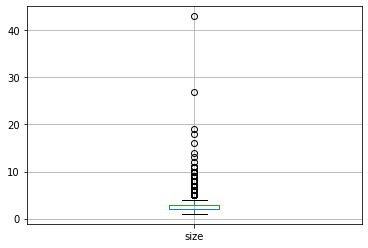

In [135]:
df[["size"]].boxplot()

In [136]:
q1 = df["size"].quantile(0.25)
q2 = df["size"].quantile(0.50)
q3 = df["size"].quantile(0.75)
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)
print("upper_bound",upper_bound)
print("lower_bound",lower_bound)

upper_bound 4.5
lower_bound 0.5


In [137]:
df["size"].loc[(df["size"]>upper_bound)|(df["size"]<lower_bound)]

9        6
45       8
58       6
64       8
68       8
        ..
13281    5
13300    5
13303    5
13311    7
13315    5
Name: size, Length: 846, dtype: int64

In [138]:
median = df["size"].loc[(df["size"]<upper_bound)&(df["size"]>lower_bound)].median()
median

3.0

In [139]:
df["size"].loc[(df["size"]>upper_bound)|(df["size"]<lower_bound)] = median

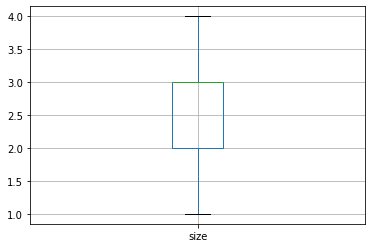

In [140]:
df[["size"]].boxplot() # impact of oulier has been reduce by imputation technique

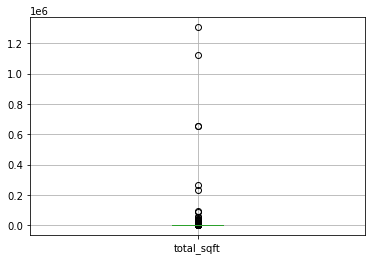

In [141]:
df[["total_sqft"]].boxplot()

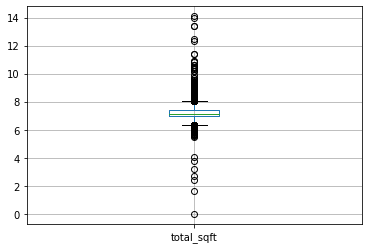

In [142]:
np.log(df[['total_sqft']]).boxplot()

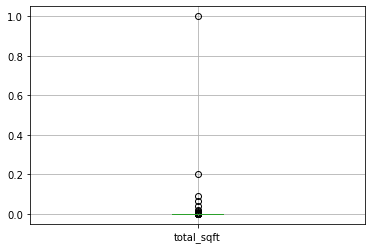

In [143]:
np.reciprocal(df[["total_sqft"]]).boxplot()

In [144]:
q1 = df["total_sqft"].quantile(0.25)
q2 = df["total_sqft"].quantile(0.50)
q3 = df["total_sqft"].quantile(0.75)
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)
print("upper_bound",upper_bound)
print("lower_bound",lower_bound)

upper_bound 2587.5
lower_bound 207.5


In [145]:
df["total_sqft"].loc[(df["total_sqft"]>upper_bound)|(df["total_sqft"]<lower_bound)]

1        2600.0
6        2732.0
7        3300.0
11       2785.0
18       2770.0
          ...  
13290    4050.0
13299    5712.0
13315    3453.0
13316    3600.0
13318    4689.0
Name: total_sqft, Length: 1242, dtype: float64

In [146]:
df["total_sqft"].loc[(df["total_sqft"]>upper_bound)] = upper_bound

In [147]:
df["total_sqft"].loc[(df["total_sqft"]<lower_bound)] = lower_bound

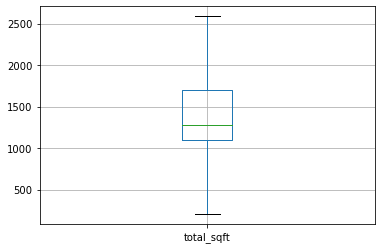

In [148]:
df[["total_sqft"]].boxplot()

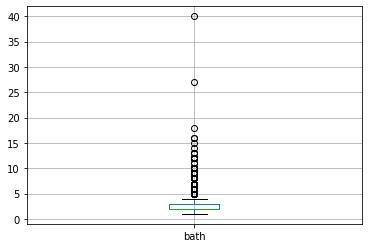

In [149]:
df[["bath"]].boxplot()

In [150]:
q1 = df["bath"].quantile(0.25)
q2 = df["bath"].quantile(0.50)
q3 = df["bath"].quantile(0.75)
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)
print("upper_bound",upper_bound)
print("lower_bound",lower_bound)

upper_bound 4.5
lower_bound 0.5


In [151]:
df["bath"].loc[(df["bath"]>upper_bound)|(df["bath"]<lower_bound)]

1        5.0
9        6.0
11       5.0
22       5.0
45       9.0
        ... 
13300    6.0
13303    5.0
13306    5.0
13311    9.0
13316    5.0
Name: bath, Length: 1039, dtype: float64

In [152]:
median = df["bath"].loc[(df["bath"]<upper_bound)&(df["bath"]>lower_bound)].median()
median

2.0

In [153]:
df["bath"].loc[(df["bath"]>upper_bound)|(df["bath"]<lower_bound)] = median

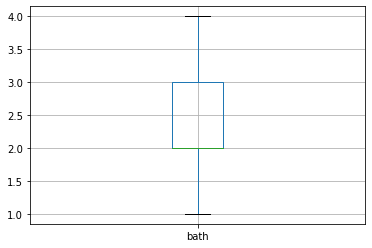

In [154]:
df[["bath"]].boxplot() # Outlier has been handled by imputaion technique

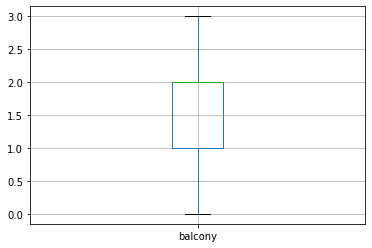

In [155]:
df[["balcony"]].boxplot() # no outlier present in the balcony Column

# Feature Selection

### Linearity

In [156]:
df

,availability,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada,site_location_other
0,0,2.0,1056.0,2.0,1.0,39.07,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,4.0,2587.5,2.0,3.0,120.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3.0,1440.0,2.0,3.0,62.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3.0,1521.0,3.0,1.0,95.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1200.0,2.0,1.0,51.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,1,3.0,2587.5,4.0,0.0,231.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,1,4.0,2587.5,2.0,2.0,400.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13317,1,2.0,1141.0,2.0,1.0,60.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,4.0,2587.5,4.0,1.0,488.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [157]:
df1= df.iloc[:,0:6]
df1

,availability,size,total_sqft,bath,balcony,price
0,0,2.0,1056.0,2.0,1.0,39.07
1,1,4.0,2587.5,2.0,3.0,120.00
2,1,3.0,1440.0,2.0,3.0,62.00
3,1,3.0,1521.0,3.0,1.0,95.00
4,1,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,1,3.0,2587.5,4.0,0.0,231.00
13316,1,4.0,2587.5,2.0,2.0,400.00
13317,1,2.0,1141.0,2.0,1.0,60.00
13318,0,4.0,2587.5,4.0,1.0,488.00


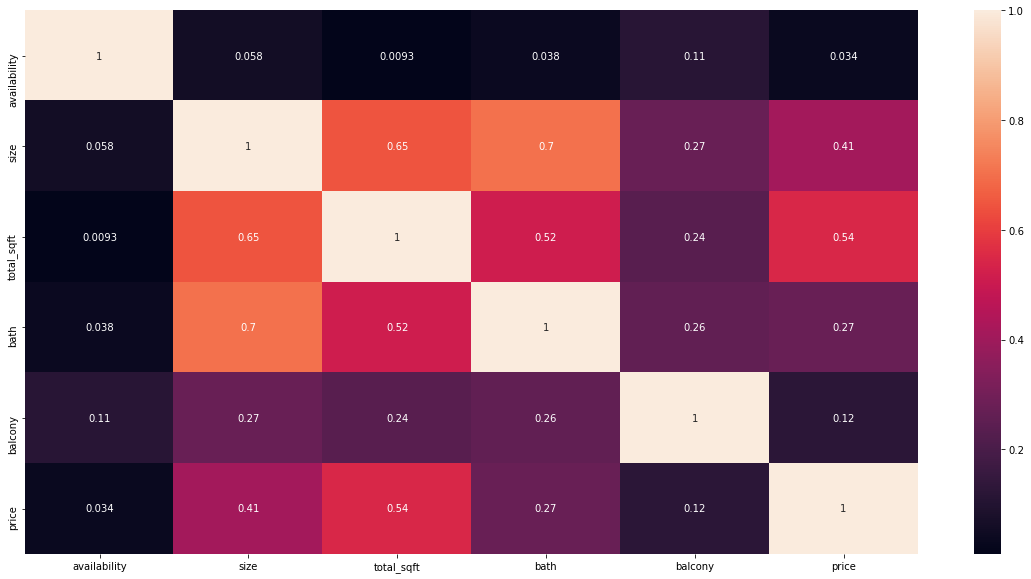

In [158]:
plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(), annot = True)

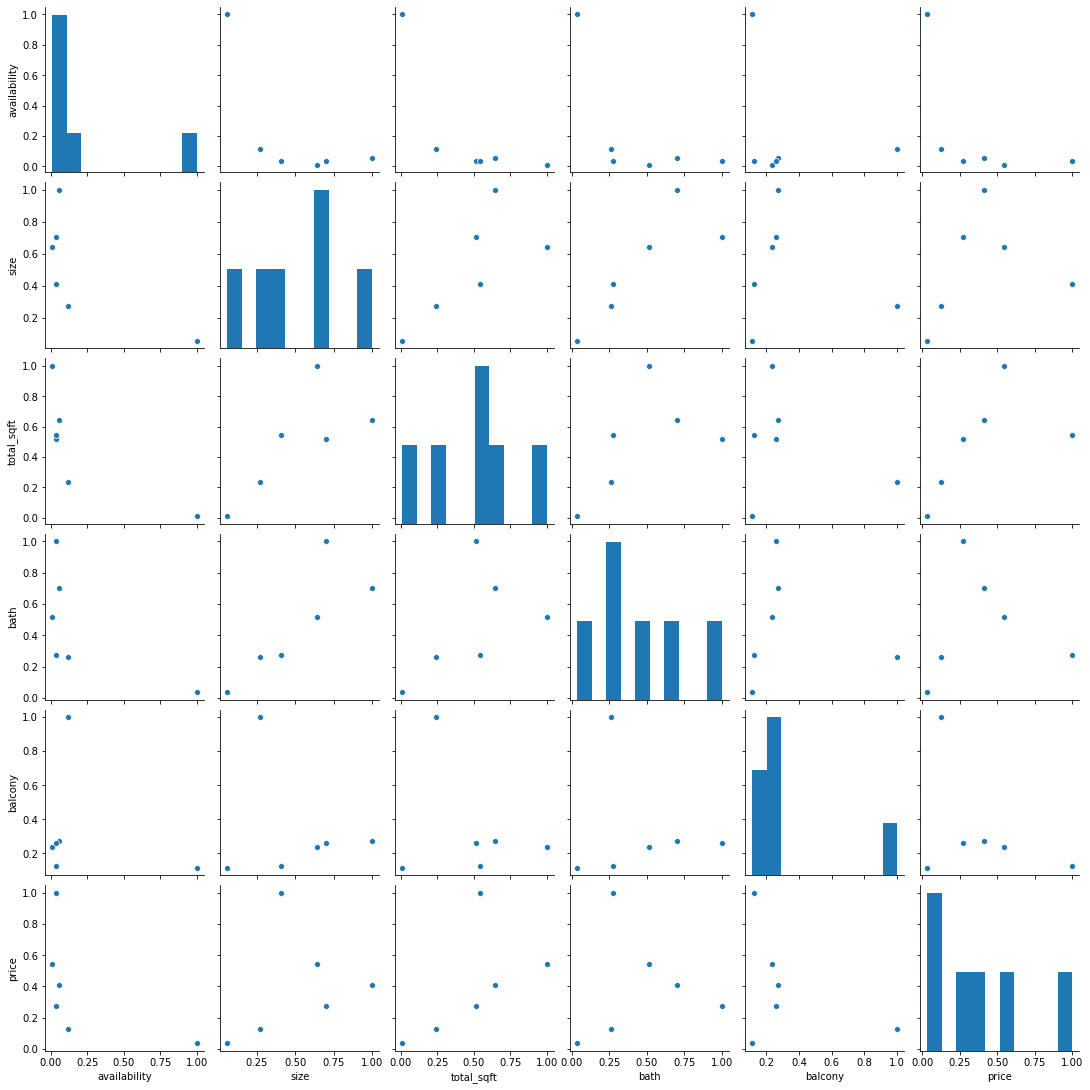

In [159]:
sns.pairplot(df1.corr())

### No Multicolinearity

In [160]:
x = df.drop("price", axis = 1)

In [161]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 106 entries, availability to site_location_other
dtypes: float64(4), int64(1), uint8(101)
memory usage: 1.8 MB


availability     4.205853
size            31.279836
total_sqft      16.474246
bath            22.392857
balcony          5.373895
price            2.147087
dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


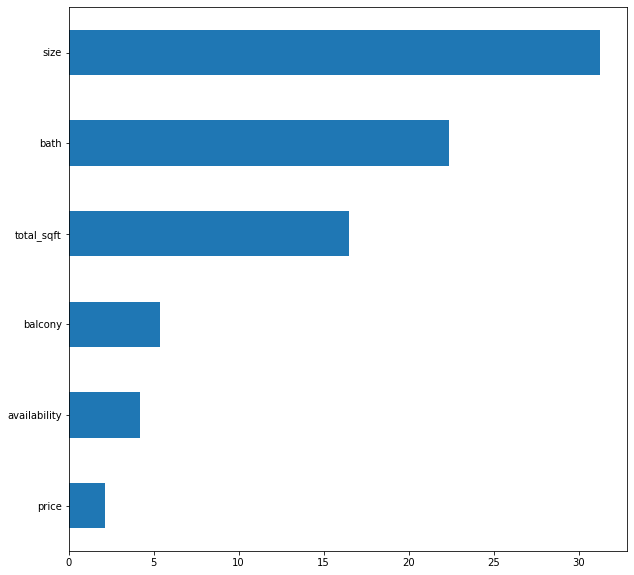

In [162]:
vif_list = []
for i in range (df1.shape[1]) :
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)

s1 = pd.Series(vif_list, index = df1.columns)
print (s1)

plt.figure(figsize = (10,10))
print (s1.sort_values().plot(kind = "barh"))

# Model Training

In [163]:
x = df.drop("price",axis = 1)
y = df["price"]

In [164]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [165]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(10656, 106)
(2664, 106)
(10656,)
(2664,)


In [166]:
model = LinearRegression()

In [167]:
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

### Training Data

In [168]:
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print ("Mean Squared Error :",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print ("Mean Absolute Error :",mae)

rmse = np.sqrt(mse)
print ("Root Mean Squared Error :",rmse)

r2 = r2_score(y_train,y_pred_train)
print ("R square :",r2)

Mean Squared Error : 13081.881148547698
Mean Absolute Error : 50.33271658416088
Root Mean Squared Error : 114.37605146422786
R square : 0.3743357863561312


### Testing Data

In [169]:
y_pred_test = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print ("Mean Squared Error :",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print ("Mean Absolute Error :",mae)

rmse = np.sqrt(mse)
print ("Root Mean Squared Error :",rmse)

r2 = r2_score(y_test,y_pred_test)
print ("R square :",r2)

Mean Squared Error : 18424.15976395747
Mean Absolute Error : 50.86745435378216
Root Mean Squared Error : 135.73562452045326
R square : 0.325533302404338


### Normality of Residual 

In [170]:
residual = y_train - y_pred_train
print (f"Residual :\n\n{residual}")

Residual :

3844       1.895699
4738    -128.825878
9497     -73.507031
1308      -6.942656
12098    -34.907394
            ...    
10955    150.012145
905       47.267140
5192      -3.827915
12172     34.586852
235      -31.440131
Name: price, Length: 10656, dtype: float64


#### kdeplot

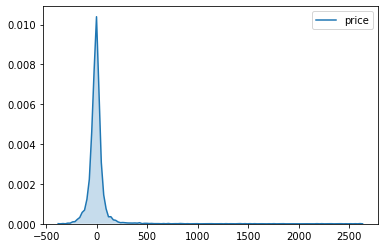

In [171]:
sns.kdeplot(residual, shade = True)

#### Hypothesis Testing

In [172]:
# shapiro test
_,p_value = shapiro(residual)
print (p_value)

if p_value >= 0.05 :
    print ("Null hypothesis accepted")
    print ("Data is Normally Distributed")
else :
    print ("Alternate hypothesis accepted")
    print ("Data is not Normally Distributed")

0.0
Alternate hypothesis accepted
Data is not Normally Distributed


In [173]:
# ks test
_,p_value = kstest(residual, "norm")
print (p_value)

if p_value >= 0.05 :
    print ("Null hypothesis accepted")
    print ("Data is Normally Distributed")
else :
    print ("Alternate hypothesis accepted")
    print ("Data is not Normally Distributed")

0.0
Alternate hypothesis accepted
Data is not Normally Distributed


In [174]:
# normal test
_,p_value = normaltest(residual)
print (p_value)

if p_value >= 0.05 :
    print ("Null hypothesis accepted")
    print ("Data is Normally Distributed")
else :
    print ("Alternate hypothesis accepted")
    print ("Data is not Normally Distributed")

0.0
Alternate hypothesis accepted
Data is not Normally Distributed


#### QQ Plot

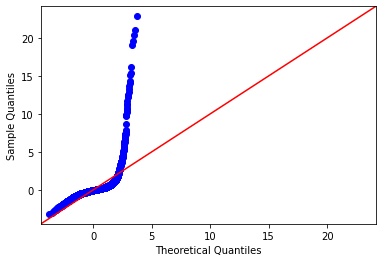

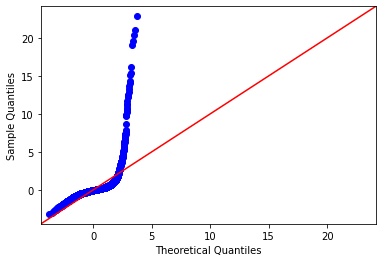

In [175]:
sm.qqplot(residual,line = "45",fit = True)

#### skewness

In [176]:
skew = residual.skew()
print ("Skewness :",skew)

Skewness : 9.142796101102778


### Homoscadasticity

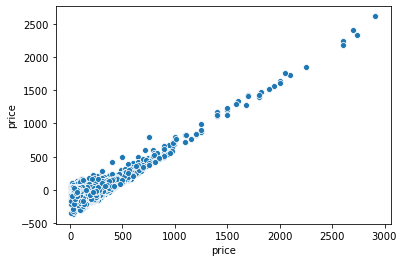

In [177]:
sns.scatterplot(x = y_train, y = residual)

In [178]:
dict_availability

{'19-Dec': 0,
 'Ready To Move': 1,
 '18-May': 0,
 '18-Feb': 0,
 '18-Nov': 0,
 '20-Dec': 0,
 '17-Oct': 0,
 '21-Dec': 0,
 '19-Sep': 0,
 '20-Sep': 0,
 '18-Mar': 0,
 '20-Feb': 0,
 '18-Apr': 0,
 '20-Aug': 0,
 '18-Oct': 0,
 '19-Mar': 0,
 '17-Sep': 0,
 '18-Dec': 0,
 '17-Aug': 0,
 '19-Apr': 0,
 '18-Jun': 0,
 '22-Dec': 0,
 '22-Jan': 0,
 '18-Aug': 0,
 '19-Jan': 0,
 '17-Jul': 0,
 '18-Jul': 0,
 '21-Jun': 0,
 '20-May': 0,
 '19-Aug': 0,
 '18-Sep': 0,
 '17-May': 0,
 '17-Jun': 0,
 '21-May': 0,
 '18-Jan': 0,
 '20-Mar': 0,
 '17-Dec': 0,
 '16-Mar': 0,
 '19-Jun': 0,
 '22-Jun': 0,
 '19-Jul': 0,
 '21-Feb': 0,
 'Immediate Possession': 1,
 '19-May': 0,
 '17-Nov': 0,
 '20-Oct': 0,
 '20-Jun': 0,
 '19-Feb': 0,
 '21-Oct': 0,
 '21-Jan': 0,
 '17-Mar': 0,
 '17-Apr': 0,
 '22-May': 0,
 '19-Oct': 0,
 '21-Jul': 0,
 '21-Nov': 0,
 '21-Mar': 0,
 '16-Dec': 0,
 '22-Mar': 0,
 '20-Jan': 0,
 '21-Sep': 0,
 '21-Aug': 0,
 '14-Nov': 0,
 '19-Nov': 0,
 '15-Nov': 0,
 '16-Jul': 0,
 '15-Jun': 0,
 '17-Feb': 0,
 '20-Nov': 0,
 '20-Jul': 0,

In [179]:
dict_size

{'2 BHK': 2,
 '3 BHK': 3,
 '4 Bedroom': 4,
 '4 BHK': 4,
 '3 Bedroom': 3,
 '1 BHK': 1,
 '2 Bedroom': 2,
 '5 Bedroom': 5,
 '6 Bedroom': 6,
 '1 Bedroom': 1,
 '8 Bedroom': 8,
 '7 Bedroom': 7,
 '5 BHK': 5,
 '9 Bedroom': 9,
 '6 BHK': 6,
 '7 BHK': 7,
 '1 RK': 1,
 '10 Bedroom': 10,
 '9 BHK': 9,
 '8 BHK': 8,
 '11 BHK': 11,
 '11 Bedroom': 11,
 '10 BHK': 10,
 '14 BHK': 14,
 '13 BHK': 13,
 '12 Bedroom': 12,
 '27 BHK': 27,
 '43 Bedroom': 43,
 '16 BHK': 16,
 '19 BHK': 19,
 '18 Bedroom': 18}

In [180]:
columns_names = x.columns
columns_names

Index(['availability', 'size', 'total_sqft', 'bath', 'balcony',
       'area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'site_location_Alandi Road',
       ...
       'site_location_Vadgaon Budruk', 'site_location_Viman Nagar',
       'site_location_Vishrant Wadi', 'site_location_Wadgaon Sheri',
       'site_location_Wagholi', 'site_location_Wakadewadi',
       'site_location_Wanowrie', 'site_location_Warje',
       'site_location_Yerawada', 'site_location_other'],
      dtype='object', length=106)

In [181]:
project_data = {"availability":dict_availability, "size":dict_size, "columns" : list(columns_names)}
project_data

{'availability': {'19-Dec': 0,
  'Ready To Move': 1,
  '18-May': 0,
  '18-Feb': 0,
  '18-Nov': 0,
  '20-Dec': 0,
  '17-Oct': 0,
  '21-Dec': 0,
  '19-Sep': 0,
  '20-Sep': 0,
  '18-Mar': 0,
  '20-Feb': 0,
  '18-Apr': 0,
  '20-Aug': 0,
  '18-Oct': 0,
  '19-Mar': 0,
  '17-Sep': 0,
  '18-Dec': 0,
  '17-Aug': 0,
  '19-Apr': 0,
  '18-Jun': 0,
  '22-Dec': 0,
  '22-Jan': 0,
  '18-Aug': 0,
  '19-Jan': 0,
  '17-Jul': 0,
  '18-Jul': 0,
  '21-Jun': 0,
  '20-May': 0,
  '19-Aug': 0,
  '18-Sep': 0,
  '17-May': 0,
  '17-Jun': 0,
  '21-May': 0,
  '18-Jan': 0,
  '20-Mar': 0,
  '17-Dec': 0,
  '16-Mar': 0,
  '19-Jun': 0,
  '22-Jun': 0,
  '19-Jul': 0,
  '21-Feb': 0,
  'Immediate Possession': 1,
  '19-May': 0,
  '17-Nov': 0,
  '20-Oct': 0,
  '20-Jun': 0,
  '19-Feb': 0,
  '21-Oct': 0,
  '21-Jan': 0,
  '17-Mar': 0,
  '17-Apr': 0,
  '22-May': 0,
  '19-Oct': 0,
  '21-Jul': 0,
  '21-Nov': 0,
  '21-Mar': 0,
  '16-Dec': 0,
  '22-Mar': 0,
  '20-Jan': 0,
  '21-Sep': 0,
  '21-Aug': 0,
  '14-Nov': 0,
  '19-Nov': 0,
  '

In [182]:
with open ("Linear_Regression_Pune_House_Data.pkl","wb") as f:
    pickle.dump(model,f)

In [183]:
with open ("Linear_Regression_Pune_House_Data.json","w") as f:
    json.dump(project_data,f)